In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd


# cargar datos de los jugadores
file_path = 'jugadoresDatos.json'
data = pd.read_json(file_path)


data.replace("-", 0, inplace=True)

# agrupar posiciones
def categorize_position(position):
    if 'POR' in position:
        return 'Portero'
    elif 'DF' in position:
        return 'Defensa'
    elif 'ME' in position or 'MC' in position:
        return 'Mediocampista'
    elif 'DL' in position or 'MP' in position:
        return 'Delantero'
    else:
        return 'Other'

data['categoria_posicion'] = data['posiciones'].apply(categorize_position)

# caracteristicas por posicion
def select_features_by_position(data, position_category):
    if position_category == 'Portero':
        return data[['edad', 'entradas', 'intercepciones', 'despejes', 'balones_perdidos', 'controles_malos']]
    elif position_category == 'Defensa':
        return data[['edad', 'entradas', 'intercepciones', 'despejes', 'balones_perdidos', 'pases_por_partido', 
                     'acierto_pases%', 'centros_por_partido']]
    elif position_category == 'Mediocampista':
        return data[['edad', 'goles', 'asistencias', 'regates', 'pases_por_partido', 'acierto_pases%', 'pases_clave',
                     'centros_por_partido', 'balones_largos_por_partido', 'pases_al_hueco_por_partido']]
    elif position_category == 'Delantero':
        return data[['edad', 'goles', 'asistencias', 'regates', 'fueras_de_juego', 'tiros_por_partido', 'balones_perdidos', 
                     'pases_por_partido', 'acierto_pases%', 'centros_por_partido']]
    else:
        return pd.DataFrame()  

# aplicarlo
grouped = data.groupby('categoria_posicion')
data_filtered = pd.concat([select_features_by_position(group, name) for name, group in grouped])

# verificacion
if data_filtered.empty:
    raise ValueError("data_filtered vacio despues de aplicar las funciones de seleccion.")

data_filtered = data_filtered.apply(pd.to_numeric, errors='coerce')
data_filtered = data_filtered.fillna(0)


#print(f"Tamaño de data_filtered: {data_filtered.shape}")
#print(f"Tamaño de data: {data.shape}")

# Alinear el índice de data_filtered y data['rating']
ratings = data.loc[data_filtered.index, 'rating']

#print(f"Tamaño de ratings: {ratings.shape}")

# division del conjunto
X_train, X_test, y_train, y_test = train_test_split(data_filtered, ratings, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#print(f"Tamaño de X_train: {X_train.shape}")
#print(f"Tamaño de X_test: {X_test.shape}")
#print(f"Tamaño de y_train: {y_train.shape}")
#print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de data_filtered: (1565, 17)
Tamaño de data: (1572, 31)
Tamaño de ratings: (1565,)
Tamaño de X_train: (1095, 17)
Tamaño de X_test: (470, 17)
Tamaño de y_train: (1095,)
Tamaño de y_test: (470,)


MSE Regresión Lineal: 0.02045449752346562
R2 Regresión Lineal: 0.6957399933256201


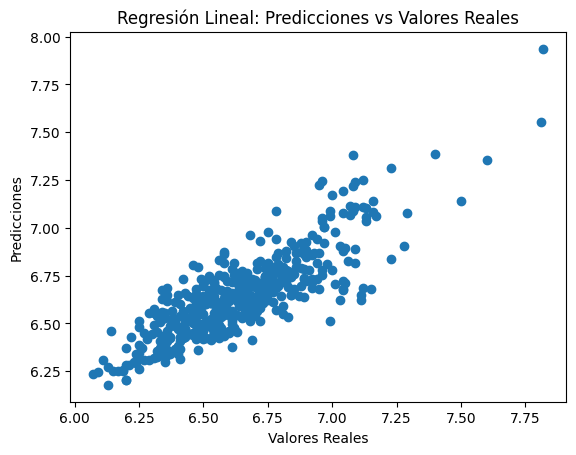

MSE Árboles de Decisión: 0.039705319148936165
R2 Árboles de Decisión: 0.40938462773751627


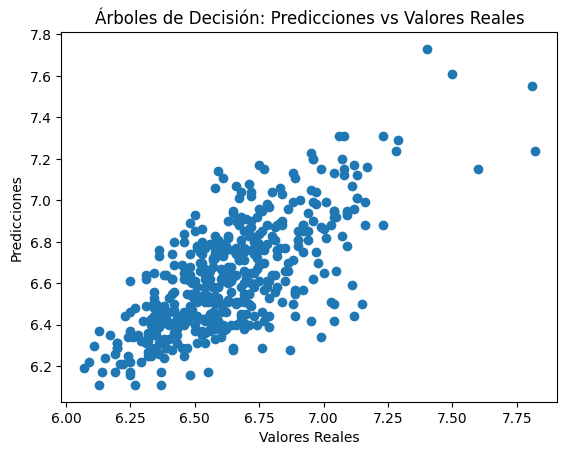

MSE Random Forest: 0.02125643313060873
R2 Random Forest: 0.6838112264174196


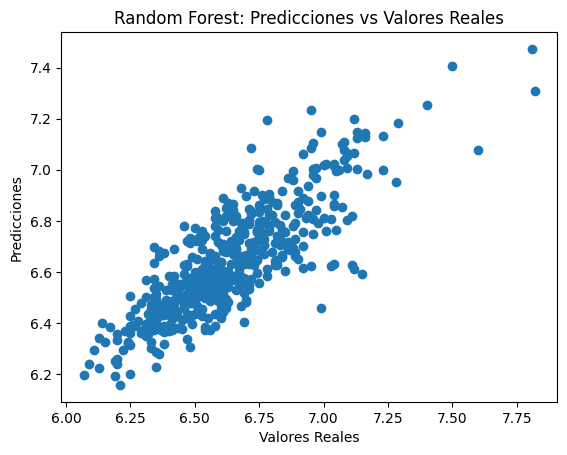

In [12]:
# regreson lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MSE Regresión Lineal: {mse_lr}")
print(f"R2 Regresión Lineal: {r2_lr}")
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Valores Reales")
plt.show()

# arbol decision
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"MSE Árboles de Decisión: {mse_dt}")
print(f"R2 Árboles de Decisión: {r2_dt}")
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Árboles de Decisión: Predicciones vs Valores Reales")
plt.show()

# random forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}")
print(f"R2 Random Forest: {r2_rf}")
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Random Forest: Predicciones vs Valores Reales")
plt.show()


In [13]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árboles de Decisión', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
})

print(results)

                Modelo       MSE        R2
0     Regresión Lineal  0.020454  0.695740
1  Árboles de Decisión  0.039705  0.409385
2        Random Forest  0.021256  0.683811


In [14]:
# prueba 10 jugadores randoms
random_players = data.sample(10, random_state=42)
random_players_features = data_filtered.loc[random_players.index]
predictions = rf_model.predict(scaler.transform(random_players_features))

resultados_jugadores = random_players[['nombre', 'rating']].copy()
resultados_jugadores['rating_predicho'] = predictions
print(resultados_jugadores)

               nombre  rating  rating_predicho
1120      Neal Maupay    6.48          6.57030
810     Hugo Magnetti    6.61          6.49110
1170   Evann Guessand    6.46          6.45760
534         Jan Oblak    6.73          6.72558
514     Ivan Provedel    6.74          6.73940
1521    Aiyegun Tosin    6.22          6.25610
522         José Gayà    6.74          6.76300
274   Bryan Cristante    6.88          6.85150
494     Konrad Laimer    6.75          6.78940
65      Manuel Ugarte    7.15          6.59350


In [15]:
import pickle

# guardar modelo y scaler para aplicarlo en pagina
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
